In [1]:
 %matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
# Combine the data into a single dataset
data_merge = pd.merge(city_df, ride_df, on="city")
# Display the data table for preview
data_merge.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
urban = data_merge.loc[data_merge["type"]=="Urban",:]
rural = data_merge.loc[data_merge["type"]=="Rural",:]
suburban = data_merge.loc[data_merge["type"]=="Suburban",:]

In [3]:
# urban
ride_df_urban = urban.groupby('city')
city_df_urban = urban.set_index('city')

In [4]:
# rural
ride_df_rural = rural.groupby('city')
city_df_rural = rural.set_index('city')

In [5]:
# suburban
ride_df_suburban = suburban.groupby('city')
city_df_suburban = suburban.set_index('city')

<IPython.core.display.Javascript object>


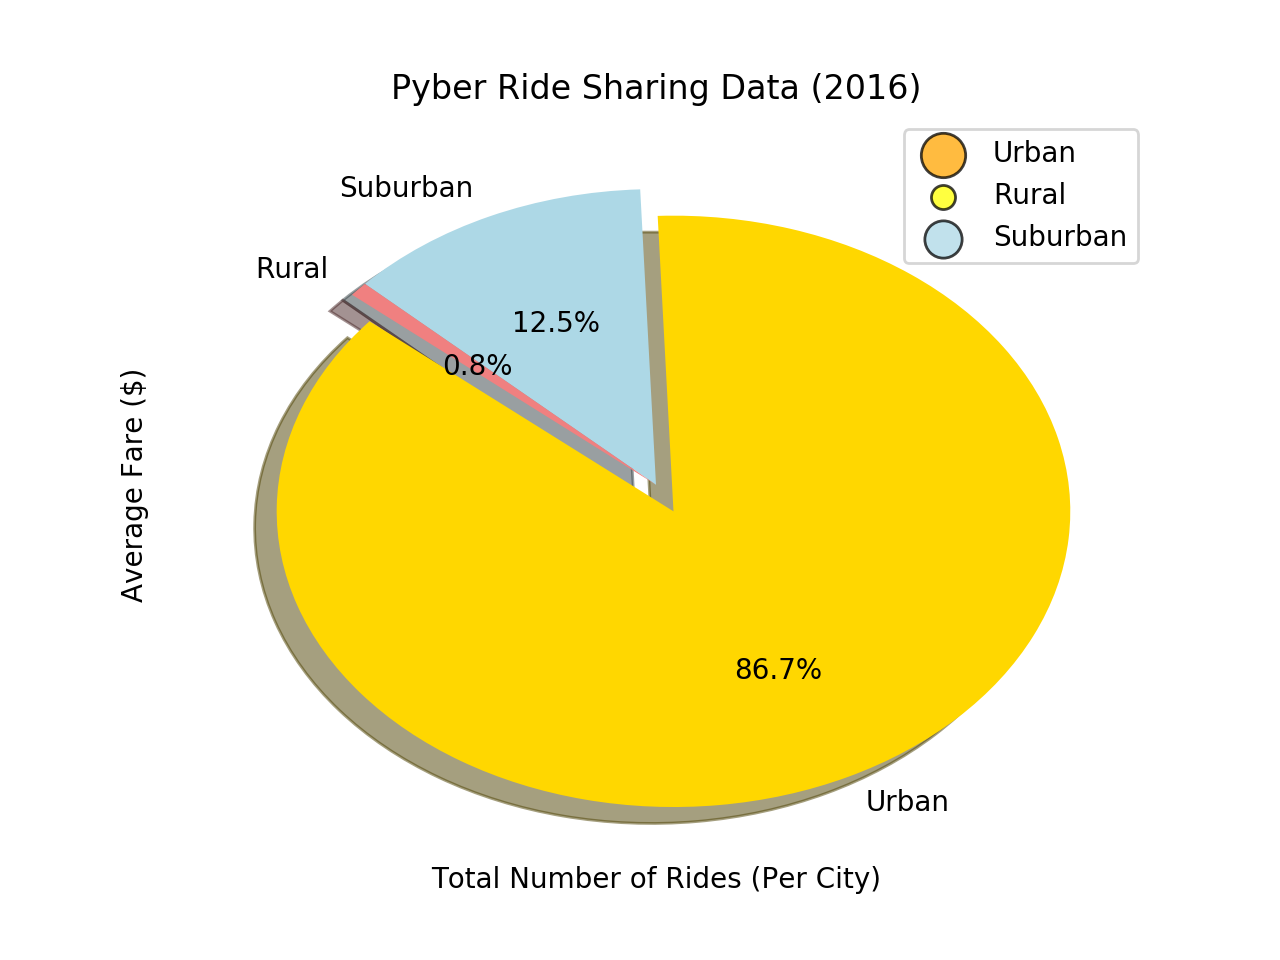

Text(0.5,1,'Pyber Ride Sharing Data (2016)')

In [6]:
# Obtain the x and y coordinates for each of the three city types
urban_x = ride_df_urban['ride_id'].count()
urban_y = ride_df_urban['fare'].mean()

rural_x = ride_df_rural['ride_id'].count()
rural_y = ride_df_rural['fare'].mean()

suburban_x = ride_df_suburban['ride_id'].count()
suburban_y = ride_df_suburban['fare'].mean()
# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, marker="o", facecolors="orange", edgecolors="black", s=urban_x*10, alpha=0.75, label = "Urban")
plt.scatter(rural_x, rural_y, marker="o", facecolors="yellow", edgecolors="black", s=rural_x*10, alpha=0.75, label = "Rural")
plt.scatter(suburban_x, suburban_y, marker="o", facecolors="lightblue", edgecolors="black", s=suburban_x*10, alpha=0.75, label = "Suburban")

# Incorporate the other graph properties

# Create a legend
plt.legend(loc = "best")
# Incorporate a text label regarding circle size
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("Pyber Ride Sharing Data (2016)")
# Save Figure

## Total Fare By City Type

In [7]:
# Calculate Type Percents
fare_urban = urban['fare'].sum()
fare_suburban = suburban['fare'].sum()
fare_rural = rural['fare'].sum()

total_fare = [fare_urban, fare_suburban, fare_rural]

In [8]:
# pie chart aesthetics 
explode = [0.1,0,0]

colors = ["gold", "lightblue", "lightcoral"]

labels = ["Urban", "Suburban","Rural"]

In [ ]:
# Build Pie Chart
plt.pie(total_fare, explode=explode, autopct="%1.1f%%", labels=labels, colors=colors, shadow=True, startangle=140)
plt.show()


## Total Rides by City Type

In [9]:
# Calculate Ride Percents
rides_urban = urban['fare'].count()
rides_suburban = suburban['fare'].count()
rides_rural = rural['fare'].count()

total_ride = [rides_urban, rides_suburban, rides_rural]


In [ ]:
# Build Pie Chart
plt.pie(total_ride, explode=explode, autopct="%1.1f%%", labels=labels, colors=colors, shadow=True, startangle=140)
plt.show()

## Total Drivers by City Types

In [10]:
# Calculate Driver Percents
drivers = data_merge.groupby("type")
drivers_total = drivers['driver_count'].sum()
drivers_totals = [drivers_total['Urban'], drivers_total['Suburban'], drivers_total['Rural']]

In [11]:
# Build Pie Chart
plt.pie(drivers_totals, explode=explode, autopct="%1.1f%%", labels=labels, colors=colors, shadow=True, startangle=140)
plt.show()